Annie: erode and dilate functions
Nidhi: resampling of data
Jason: modular function which takes in things and runs max's algorithm to establish ground truth mean

take in processed image and raw, return cuts of raw

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

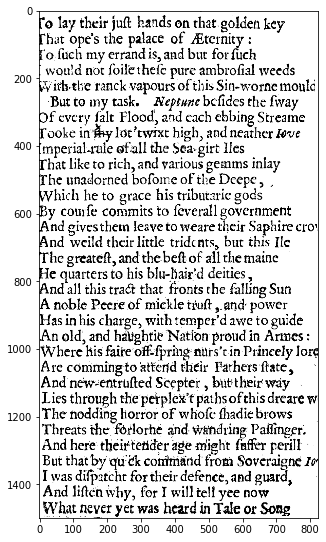

(1500, 825)


In [2]:
img = cv.imread("anon_blank_blank_00height_amaske-6912_page1r.tif", 0)
plt.figure(figsize=(5,10))
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

In [3]:
sumMatrix = np.sum(img, 1)
print(sumMatrix.shape)
rows = np.arange(0,sumMatrix.shape[0])
rowsums = pd.DataFrame(sumMatrix, columns=["sums"])
rowsums.reset_index(level=0, inplace=True)
rowsums.head()

(1500,)


,index,sums
0,0,208438
1,1,208752
2,2,208893
3,3,209133
4,4,209583


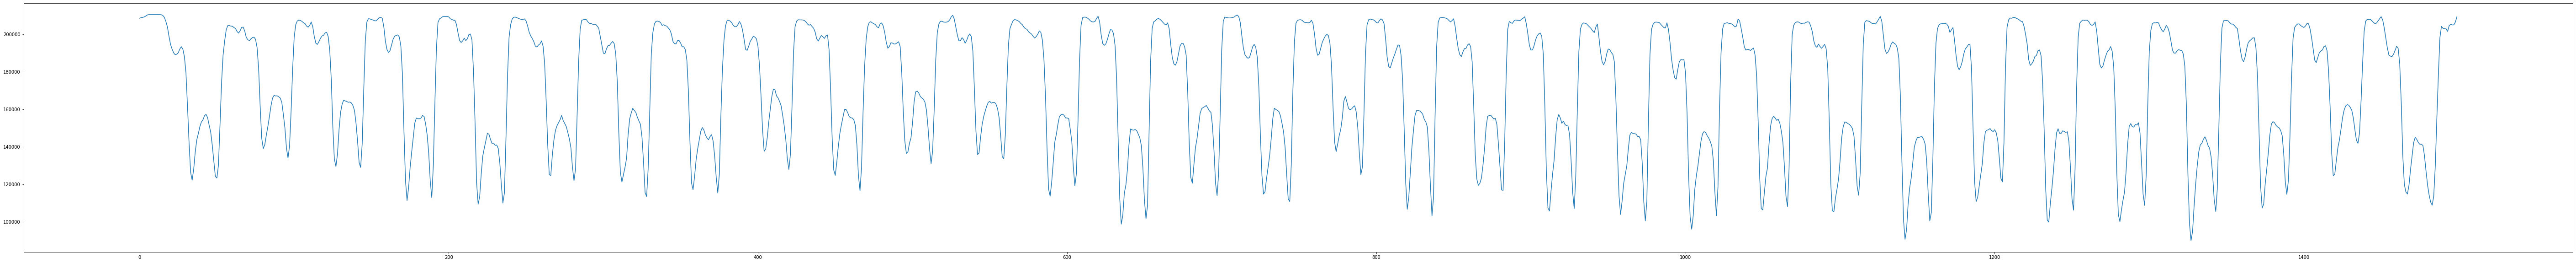

In [4]:
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
plt.show()

In [5]:
# r is the row height
# d is the top offset
# k is the number of rows = floor(numPixelRows / r)

rRange = np.arange(25, 51)
dRange = np.arange(0, 21)
kRange = np.unique(np.floor(sumMatrix.shape[0] / rRange))
print(kRange)

[30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 44. 45. 46. 48. 50.
 51. 53. 55. 57. 60.]


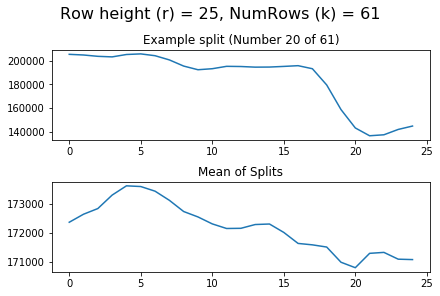

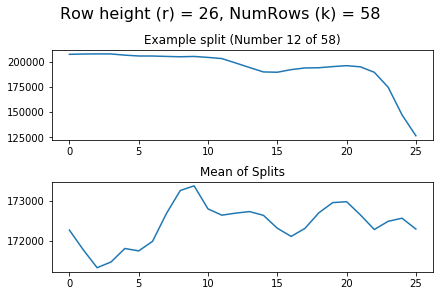

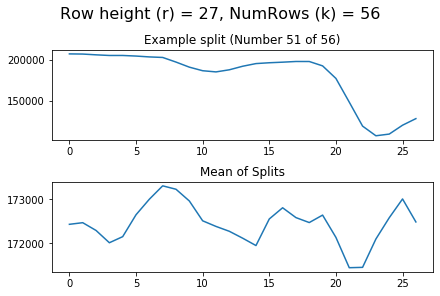

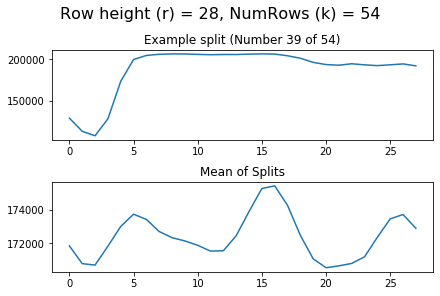

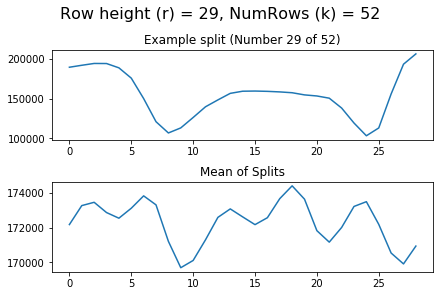

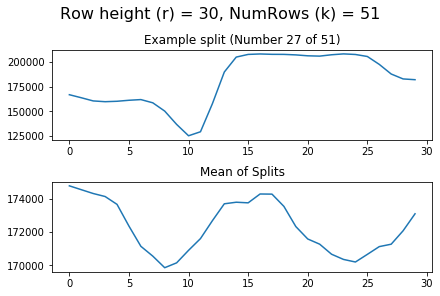

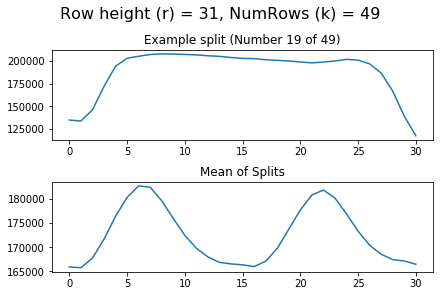

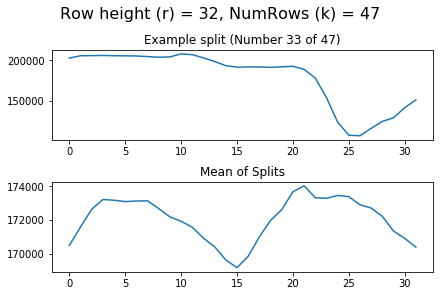

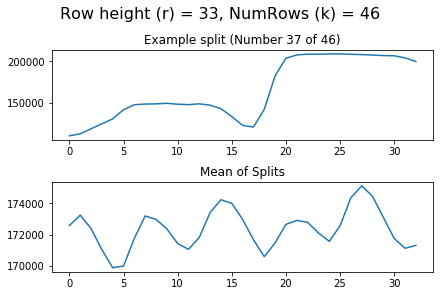

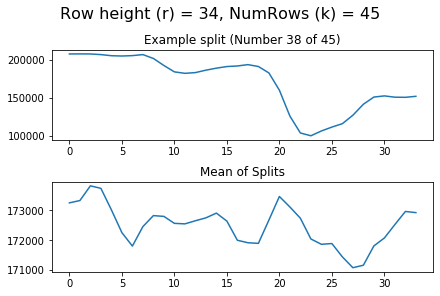

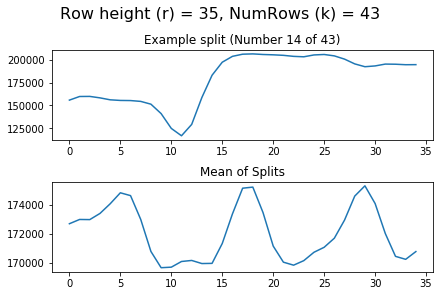

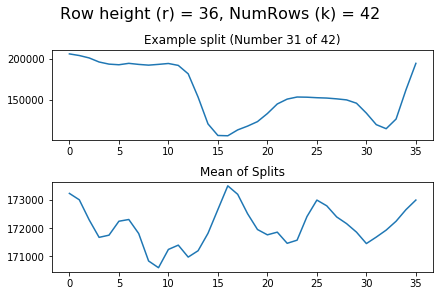

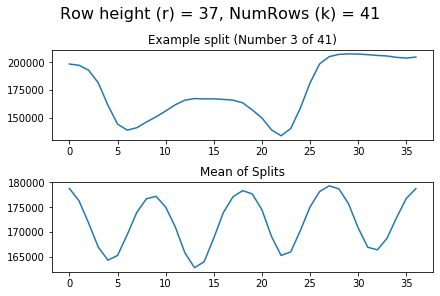

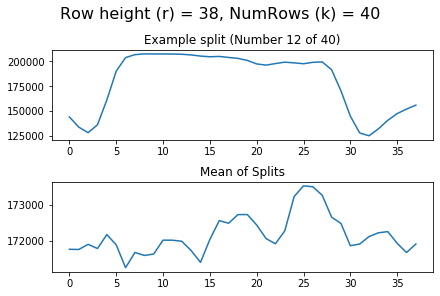

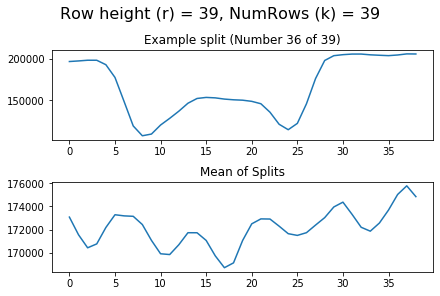

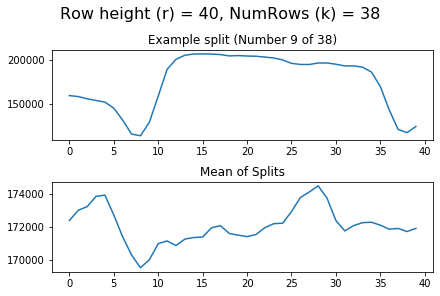

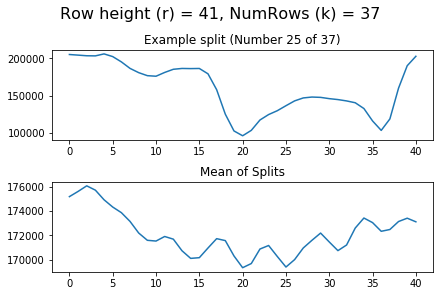

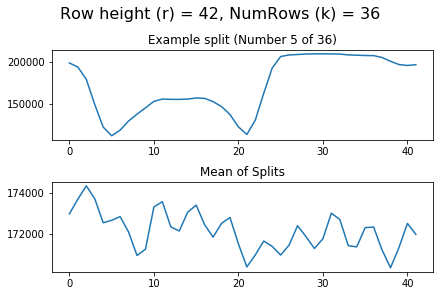

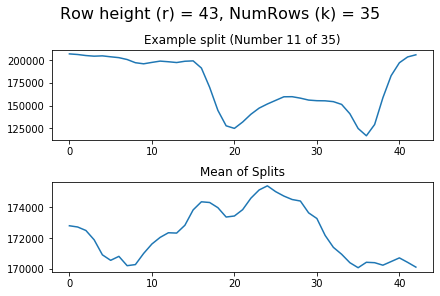

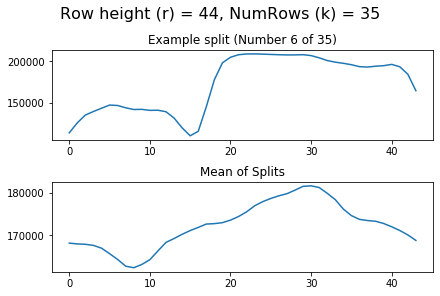

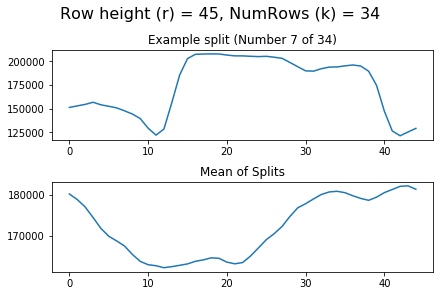

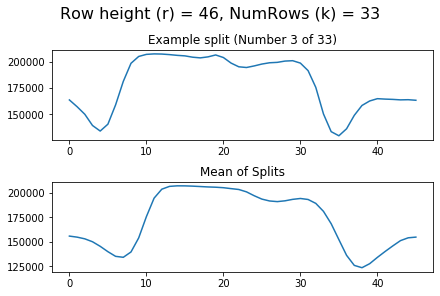

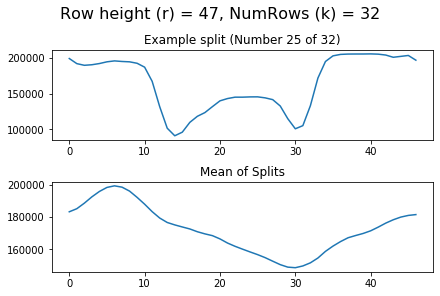

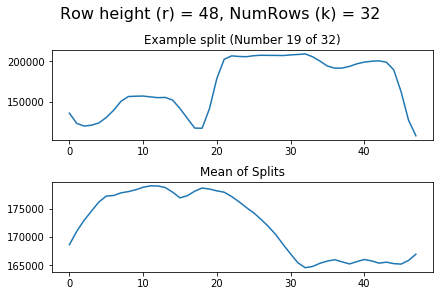

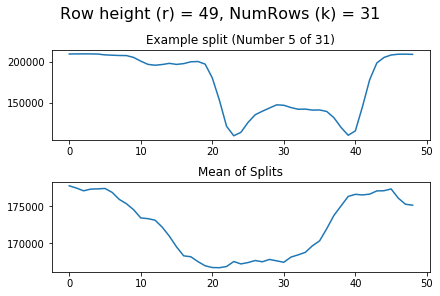

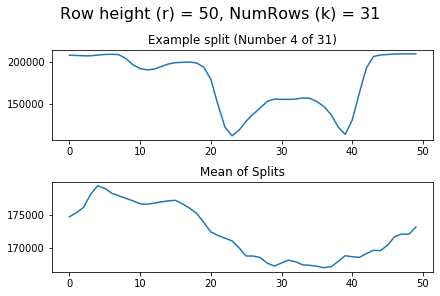

In [6]:
vars = np.zeros(shape=(rRange.shape[0]))
for r in rRange:
    r_splits = np.array([(r*i) for i  in range(int(np.floor((sumMatrix.shape[0] / r))))])
    #print(r_splits)
    #print(r_splits.shape)
    img_splits = np.array(np.array_split(sumMatrix, r_splits))
    #print("Height of each row (r): " + str(r))
    #print("Number of rows (k): " + str(img_splits.shape[0]))
    #print("Row sum values in each split")
    #print(img_splits)
    
    fig, axs = plt.subplots(2, 1, constrained_layout = True)
    rand = np.random.randint(1, img_splits.shape[0] - 1)
    axs[0].set_title("Example split (Number " + str(rand) + " of " + str(img_splits.shape[0]) + ")")
    axs[0].plot(np.arange(0, img_splits[rand].shape[0]), img_splits[rand].transpose())
    fig.suptitle("Row height (r) = " + str(r) + ", NumRows (k) = " + str(img_splits.shape[0]), fontsize=16)
    
    mean_splits = np.mean(img_splits[1:-1], axis=0)
    var_splits = np.var(img_splits[1:-1], axis=0)
    #print(var_splits)
    vars[r-rRange[0]] = np.sum(var_splits)
    axs[1].set_title("Mean of Splits")
    axs[1].plot(np.arange(0, img_splits[1].shape[0]), mean_splits.transpose())
    plt.show()

In [7]:
print(vars)

[2.57590126e+10 2.67527539e+10 2.77541456e+10 2.87666008e+10
 2.98285149e+10 3.08684199e+10 3.08479956e+10 3.28684693e+10
 3.39535312e+10 3.48801373e+10 3.59479860e+10 3.70195454e+10
 3.71255770e+10 3.91078614e+10 4.00454216e+10 4.11053874e+10
 4.21282648e+10 4.33985611e+10 4.43572205e+10 4.40445744e+10
 4.38764252e+10 1.01632067e+10 3.87535216e+10 4.79124714e+10
 4.99473716e+10 5.07089667e+10]


In [8]:
R = np.where(vars == np.amin(vars))[0][0] + 25
print("Found best row height: " + str(R))

Found best row height: 46


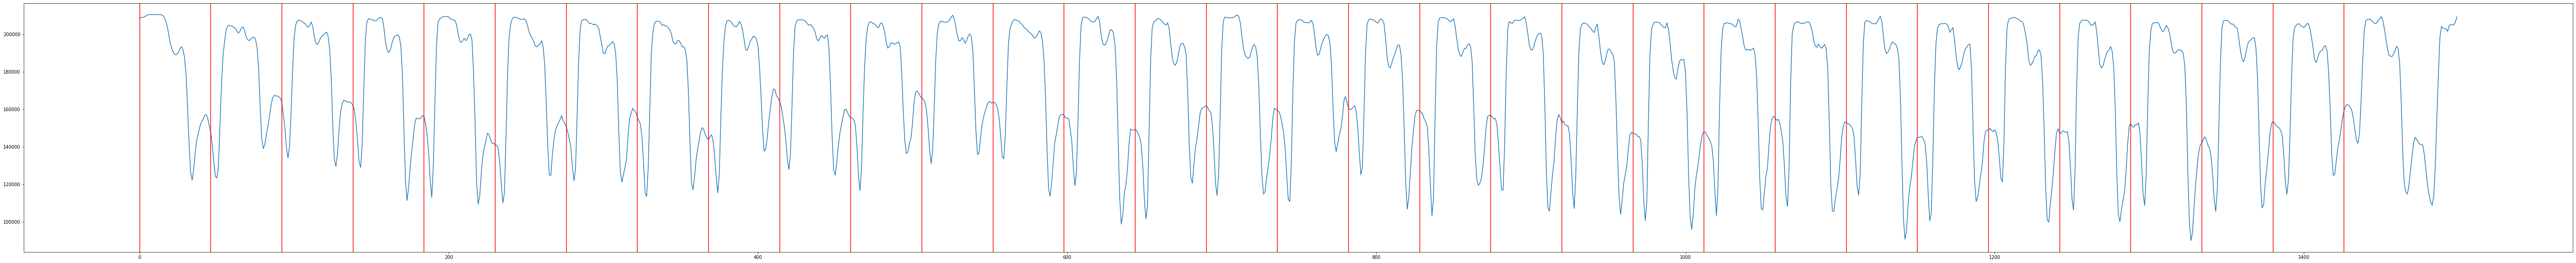

In [9]:
R_splits = np.array([R*i for i  in range(int(np.floor((sumMatrix.shape[0] / R))))])
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for vl in R_splits:
    plt.axvline(x=vl, color="red")
plt.show()

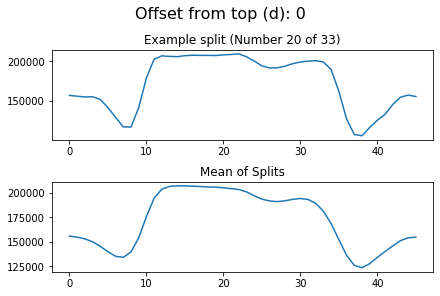

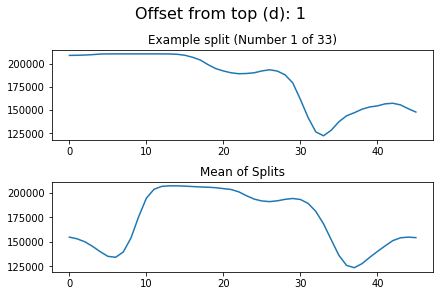

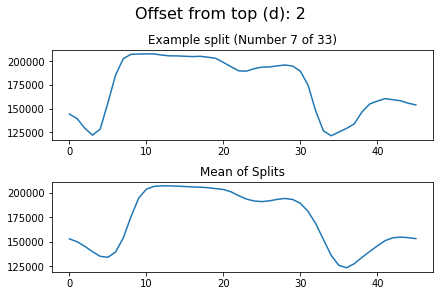

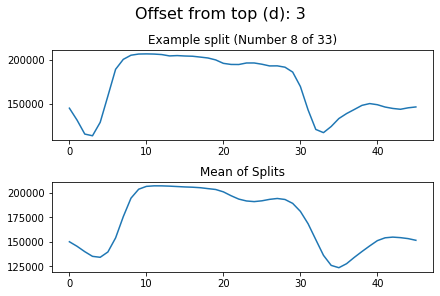

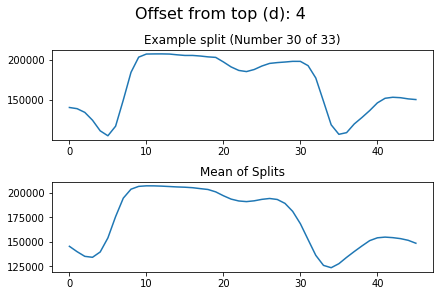

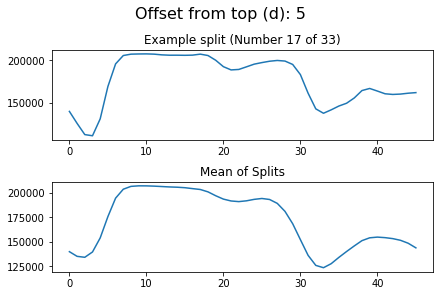

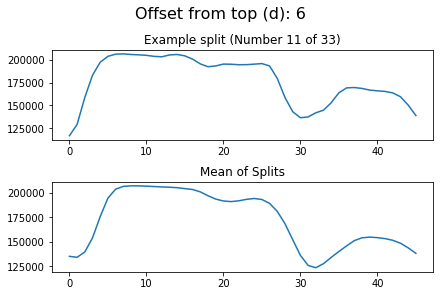

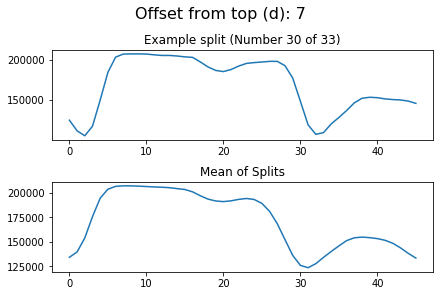

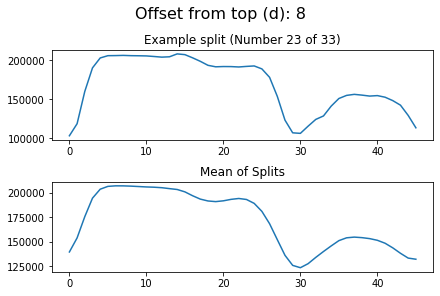

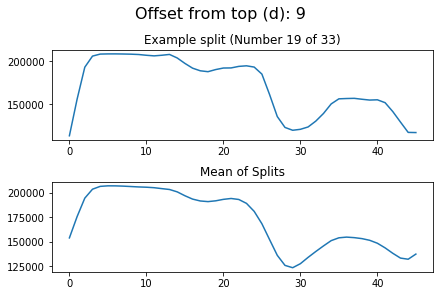

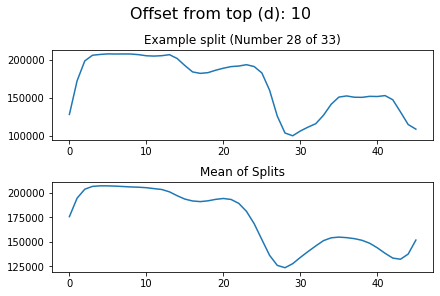

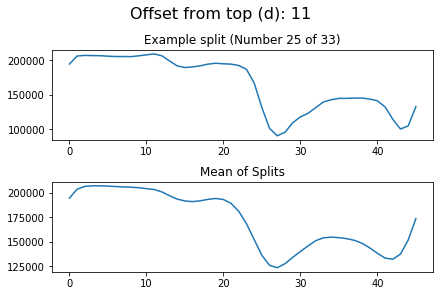

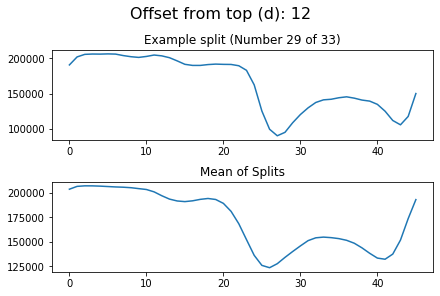

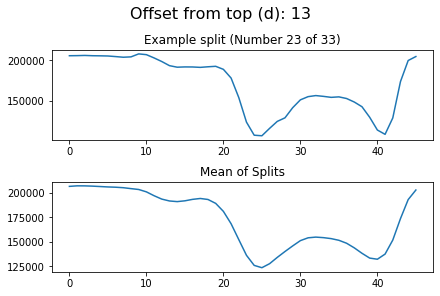

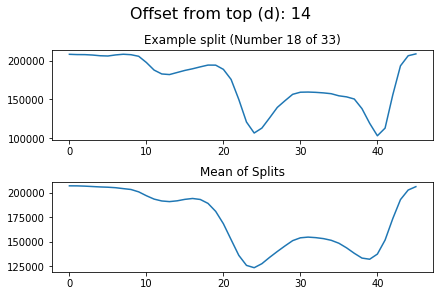

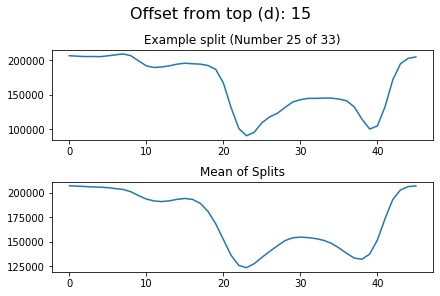

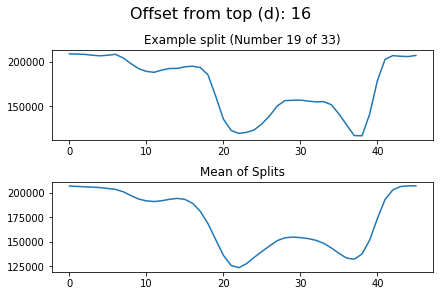

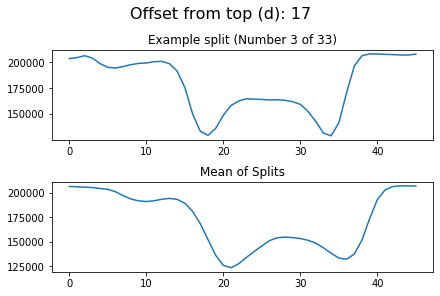

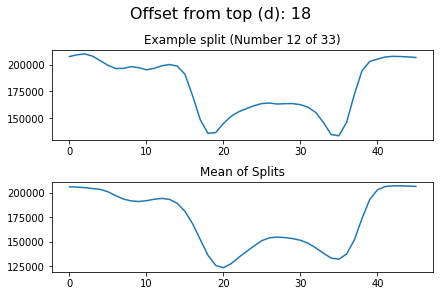

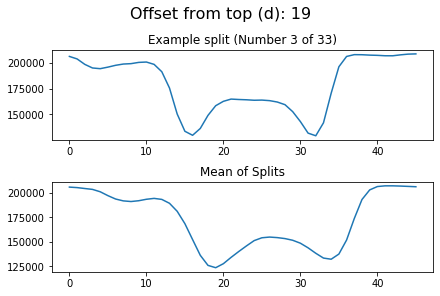

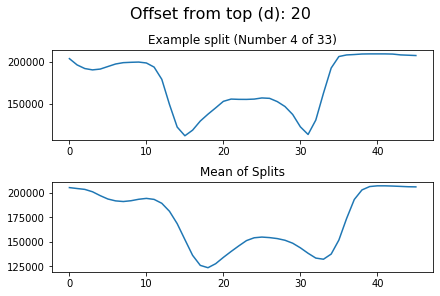

In [10]:
dvars = np.zeros(shape=(dRange.shape[0]))
for d in dRange:
    d_splits = np.array([(R*i + d) for i  in range(int(np.floor((sumMatrix.shape[0] / R))))])
    #print(r_splits)
    #print(r_splits.shape)
    img_splits_d = np.array(np.array_split(sumMatrix, d_splits))
    #print("Offset from top (d): " + str(d))
    #print("Row sum values in each split")
    #print(img_splits)
        
    fig, axs = plt.subplots(2, 1, constrained_layout = True)
    rand = np.random.randint(1, img_splits_d.shape[0] - 1)
    axs[0].set_title("Example split (Number " + str(rand) + " of " + str(img_splits_d.shape[0]) + ")")
    axs[0].plot(np.arange(0, img_splits_d[rand].shape[0]), img_splits_d[rand].transpose())
    fig.suptitle("Offset from top (d): " + str(d), fontsize=16)
    
    mean_splits_d = np.mean(img_splits_d[1:-1], axis=0)
    var_splits_d = np.var(img_splits_d[1:-1], axis=0)
    #print(var_splits_d)
    dvars[d-dRange[0]] = np.sum(var_splits_d)
    axs[1].set_title("Mean of Splits")
    axs[1].plot(np.arange(0, img_splits_d[1].shape[0]), mean_splits_d.transpose())
    plt.show()

In [11]:
print(dvars)

[1.01632067e+10 1.00714445e+10 9.97629280e+09 9.87589974e+09
 9.76538236e+09 9.63747308e+09 9.48724950e+09 9.31426409e+09
 9.12991574e+09 8.96371441e+09 8.86042809e+09 8.84298113e+09
 8.86189780e+09 8.87127146e+09 8.87147864e+09 8.87111618e+09
 8.87084896e+09 8.87072734e+09 8.87080144e+09 8.87069236e+09
 8.86916968e+09]


In [12]:
D = np.where(dvars == np.amin(dvars))[0][0] + 25
print("Found offset height with least variance: " + str(D))

Found offset height with least variance: 36


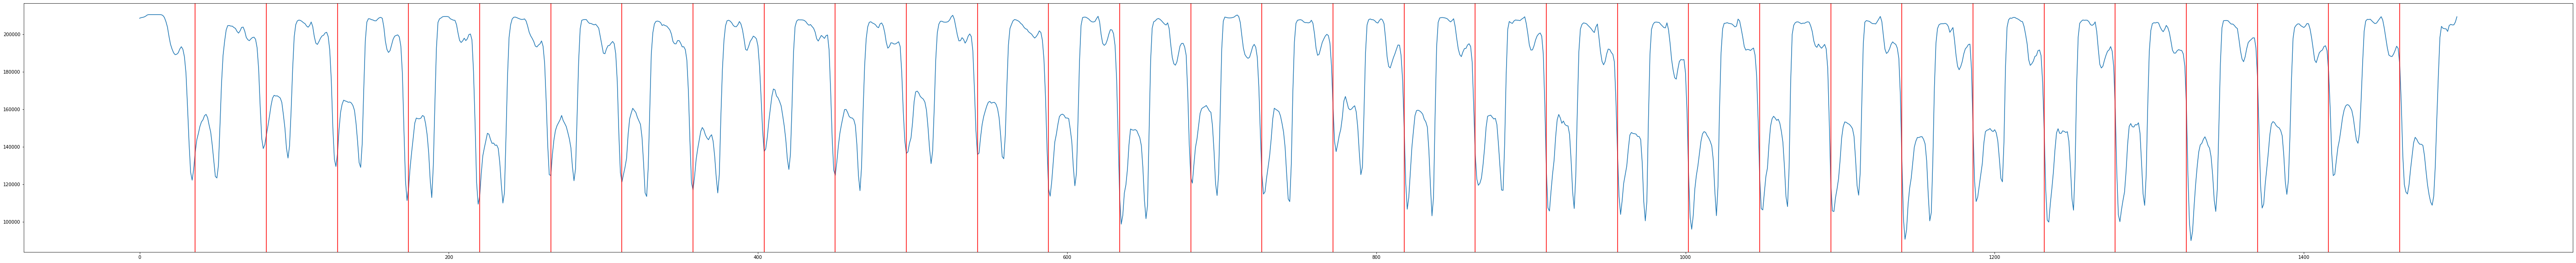

In [13]:
RD_splits = np.array([(R*i+D) for i  in range(int(np.floor((sumMatrix.shape[0] / R))))])
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for vl in RD_splits:
    plt.axvline(x=vl, color="red")
plt.show()

[36, 82, 128, 174, 220, 266, 312, 358, 404, 450, 496, 542, 588, 634, 680, 726, 772, 818, 864, 910, 956, 1002, 1048, 1094, 1140, 1186, 1232, 1278, 1324, 1370, 1416, 1462]
46


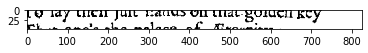

46


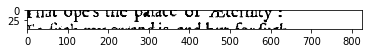

46


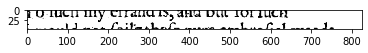

46


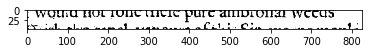

46


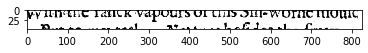

46


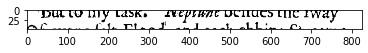

46


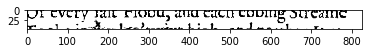

46


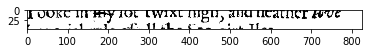

46


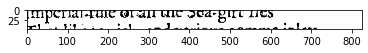

46


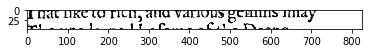

46


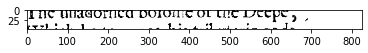

46


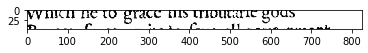

46


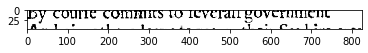

46


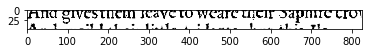

46


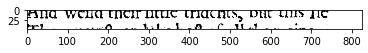

46


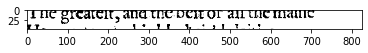

46


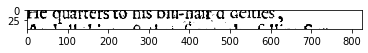

46


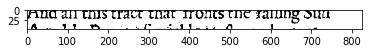

46


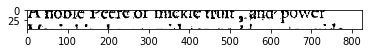

46


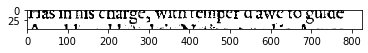

46


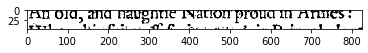

46


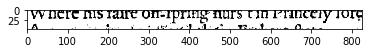

46


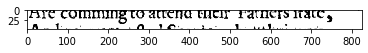

46


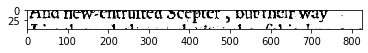

46


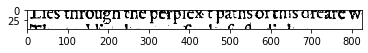

46


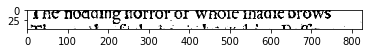

46


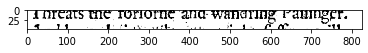

46


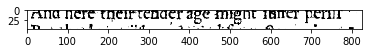

46


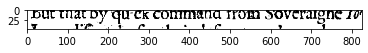

46


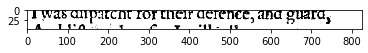

46


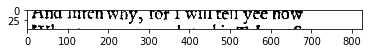

In [14]:
split_indices = [(R*(i) + D) for i  in range(int(np.floor((sumMatrix.shape[0] / R))))]
print(split_indices)
split = np.array(np.array_split(sumMatrix, split_indices))
for row in range(0,np.array(split_indices).shape[0] - 1):
    rowHeight = split_indices[row+1] - split_indices[row]
    print(rowHeight)
    cutLine = img[split_indices[row]:split_indices[row+1],:]
    plt.imshow(cutLine, cmap="gray")
    plt.show()

In [15]:
# R = 46, D = 16
bestR = rRange[21]
bestD = dRange[16]
split_indices = [(bestR*(i) + bestD) for i  in range(int(np.floor((sumMatrix.shape[0] / bestR))))]
print(split_indices)

[16, 62, 108, 154, 200, 246, 292, 338, 384, 430, 476, 522, 568, 614, 660, 706, 752, 798, 844, 890, 936, 982, 1028, 1074, 1120, 1166, 1212, 1258, 1304, 1350, 1396, 1442]


In [16]:
split = np.array(np.array_split(sumMatrix, split_indices))
print(split.shape)

(33,)


46


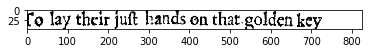

46


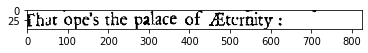

46


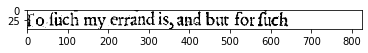

46


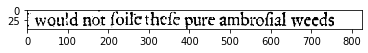

46


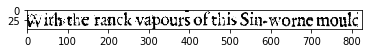

46


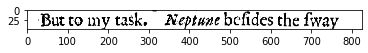

46


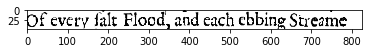

46


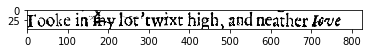

46


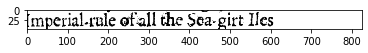

46


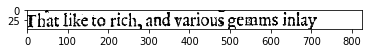

46


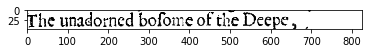

46


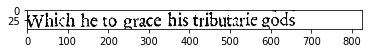

46


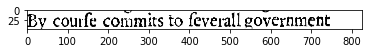

46


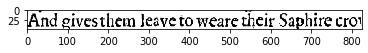

46


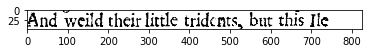

46


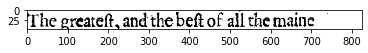

46


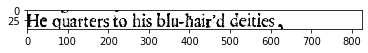

46


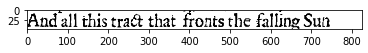

46


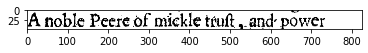

46


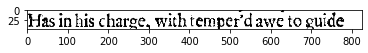

46


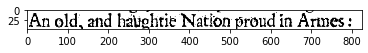

46


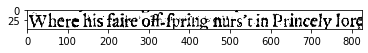

46


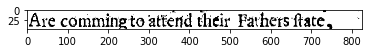

46


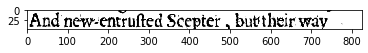

46


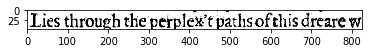

46


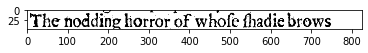

46


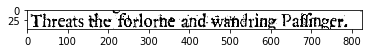

46


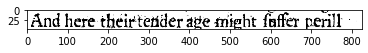

46


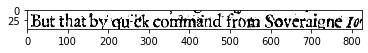

46


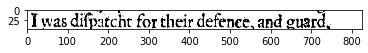

46


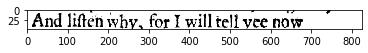

In [17]:
bestCutSums = []
for row in range(0,np.array(split_indices).shape[0] - 1):
    rowHeight = split_indices[row+1] - split_indices[row]
    print(rowHeight)
    cutLine = img[split_indices[row]:split_indices[row+1],:]
    bestCutSums.append(np.sum(cutLine, axis=1))
    plt.imshow(cutLine, cmap="gray")
    plt.show()

(46,)
8870848956.414152


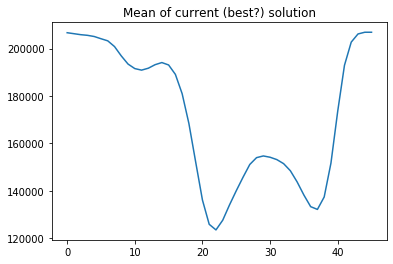

In [18]:
bestCutSums = np.array(bestCutSums)
best_means = np.mean(bestCutSums, axis=0)
best_var = np.var(bestCutSums, axis=0)
print(best_means.shape)
print(np.sum(best_var))
plt.title("Mean of current (best?) solution")
plt.plot(np.arange(0, best_means.shape[0]), best_means.transpose())
plt.show()

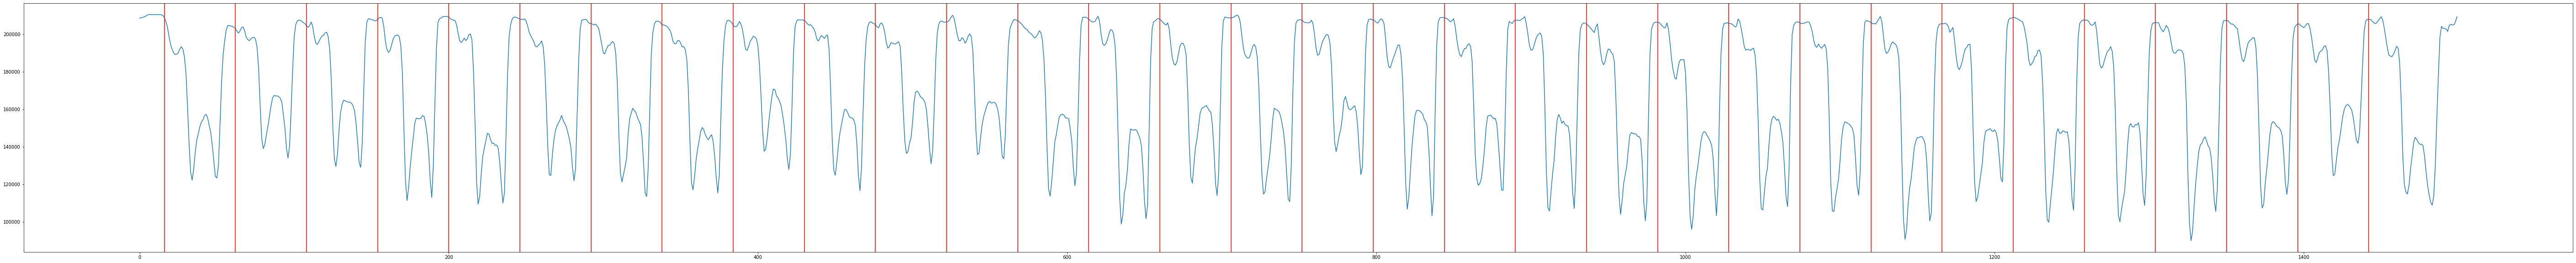

In [19]:
best_splits = [(bestR*(i) + bestD) for i  in range(int(np.floor((sumMatrix.shape[0] / bestR))))]
plt.figure(figsize=(100,10))
plt.plot(np.arange(0, sumMatrix.shape[0]), sumMatrix.transpose())
for vl in best_splits:
    plt.axvline(x=vl, color="red")
plt.show()

In [20]:
sol_rows = pd.read_csv("anon_blank_blank_00height_amaske-6912_page1r_lines.csv", header=None, names=["start", "end"])
print(sol_rows)
print(sol_rows.shape)

    start   end
0      16    63
1      62   109
2     108   155
3     155   202
4     201   248
5     247   294
6     294   341
7     340   387
8     386   433
9     432   479
10    478   525
11    525   572
12    571   618
13    617   664
14    663   710
15    709   756
16    755   802
17    801   848
18    846   893
19    893   940
20    939   986
21    985  1032
22   1030  1077
23   1077  1124
24   1123  1170
25   1169  1216
26   1215  1262
27   1262  1309
28   1308  1355
29   1354  1401
30   1400  1447
(31, 2)


In [21]:
rowHeight = sol_rows.loc[0].end - sol_rows.loc[0].start
print(rowHeight)

47


In [22]:
cutRowSums = []
for row_line in range(0,sol_rows.shape[0]):
    cutLine = img[sol_rows.loc[row_line].start:sol_rows.loc[row_line].end,:]
    cutRowSums.append(np.sum(cutLine, axis=1))
cutRowSums = np.array(cutRowSums)
sol_means = np.mean(cutRowSums, axis=0)
sol_var = np.var(cutRowSums, axis=0)
print(sol_means.shape)
print(np.sum(sol_var))

(47,)
3666720353.962539


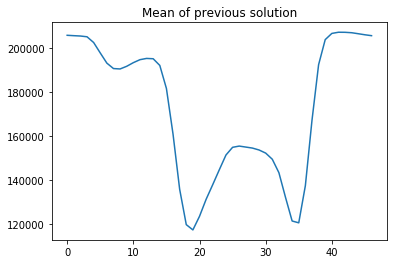

In [23]:
plt.title("Mean of previous solution")
plt.plot(np.arange(0, sol_means.shape[0]), sol_means.transpose())
plt.show()